## Q4

<h3> in this section we want to implement histogram matching </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def calc_hist(image):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist = np.zeros(256,dtype=int) # generates a numpy array with all its values set to zero and size of 256
    
    #######################
    #    your code here   #
    values, counts = np.unique(image, return_counts=True) # this function returns different values in an array with their number of repetition
    hist[values] = counts # this works in numpy, values is the index array and counts is the value stored in that index
    #######################
    
    return hist

Text(0.5, 1.0, 'histogram')

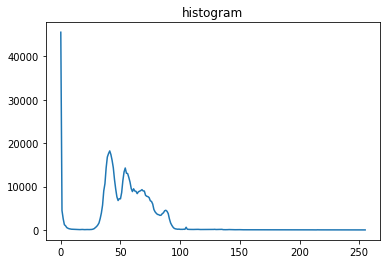

In [3]:
src = cv2.imread('Q4_images/input.png')
# ref = cv2.imread('ref.png')
plt.figure()
plt.plot(calc_hist(src))
plt.title('histogram')

In [4]:
def calc_cdf(channel):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''
  #######################
  hist = calc_hist(channel) # calculates the histogram for the channel which is an image with one channel
  pdf = hist / (channel.shape[0]*channel.shape[1]) # this works in numpy and it is amazing, it operates on the hist array element-wise and returns a new array with modified values
  cdf = np.cumsum(pdf) # this function in numpy takes an array and returns an array in which ith element shows sum of elements from 0 to ith index of input array
  #######################
  return cdf

In [5]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image 
  '''
  output_image = src_image.copy()
  channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
  for channel, title in channels: # we should do the histogram matching routine for every channel seperately

    #######################
    #    your code here   #
    # Step 1: calculate CDF for source image
    # Step 2: calculate CDF for reference image
    # Step 3: now we should map source new intensities to those of reference image with same CDF and numpy interp function help us do that.
    src_cdf = calc_cdf(src_image[:,:,channel])
    ref_cdf = calc_cdf(ref_image[:,:,channel])
    inverse_func = np.interp(src_cdf, ref_cdf, np.arange(256)) # Parameter 1: numbers that should be predicted and mapped to one of intensity values. Parameter 2: inputs of function that is going to be used on first parameter for prediction. Parameter 3: corresponding outputs of second parameter.
    output_image[:,:,channel] = inverse_func[output_image[:,:,channel]]
    #######################
    
  return output_image

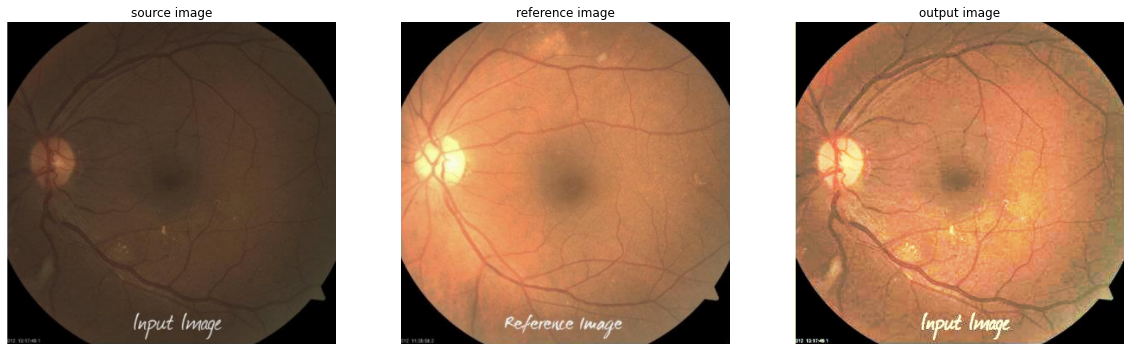

In [6]:
# Do not change this cell
src = cv2.imread('Q4_images/input.png')
ref = cv2.imread('Q4_images/ref.png')
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

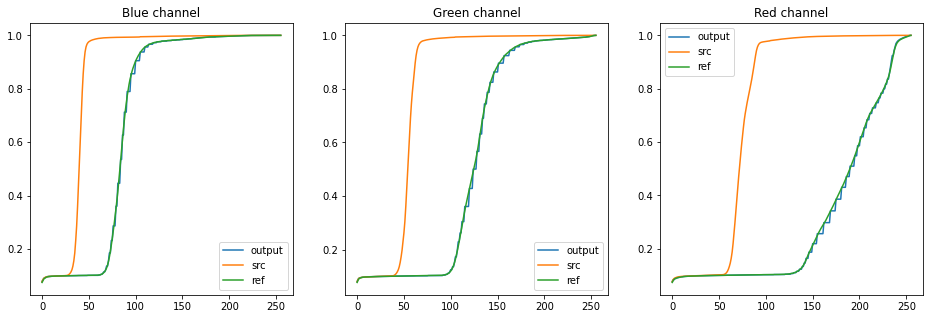

In [7]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)